<a href="https://colab.research.google.com/github/parth1614/QuantumComputing-Qiskit/blob/main/Dj_Algo_Both.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install qiskit

     |████████████████████████████████| 6.5 MB 4.4 MB/s 
     |████████████████████████████████| 18.0 MB 351 kB/s 
     |████████████████████████████████| 240 kB 37.8 MB/s 
     |████████████████████████████████| 200 kB 46.4 MB/s 
     |████████████████████████████████| 112 kB 43.1 MB/s 
     |████████████████████████████████| 54 kB 2.6 MB/s 
     |████████████████████████████████| 1.6 MB 45.3 MB/s 
     |████████████████████████████████| 49 kB 5.8 MB/s 
     |████████████████████████████████| 943 kB 30.8 MB/s 
     |████████████████████████████████| 37.5 MB 1.3 MB/s 
     |████████████████████████████████| 38.1 MB 1.4 MB/s 
     |████████████████████████████████| 49 kB 6.2 MB/s 
     |████████████████████████████████| 4.0 MB 23.0 MB/s 
     |████████████████████████████████| 112 kB 41.3 MB/s 
  Created wheel for qiskit: filename=qiskit-0.36.1-py3-none-any.whl size=11887 sha256=42d7afcbd6d0f0dee42beeafb2550a38addb14e59a5d04c1db171ddf4bf9a51c
  Stored in directory: /root/.cache/pip/whee

In [2]:
from qiskit import QuantumCircuit,Aer,assemble

from qiskit.visualization import plot_histogram,plot_bloch_multivector

from math import pi

sim = Aer.get_backend("aer_simulator")

In [3]:
def balanced_black_box(qc):
  qc.cx(0,2)
  qc.cx(1,2)
  return qc

def constant_black_box(qc):
  return qc

In [4]:
qc = QuantumCircuit(3,2)
qc.x(2)
qc.barrier()
qc.h([0,1,2])
qc.barrier()
qc.barrier()
qc = constant_black_box(qc)
qc.barrier()
qc.barrier()
qc.h([0,1,2])
qc.measure([0,1],[0,1])
qc.draw()

░ ┌───┐ ░  ░  ░  ░ ┌───┐┌─┐   
q_0: ──────░─┤ H ├─░──░──░──░─┤ H ├┤M├───
           ░ ├───┤ ░  ░  ░  ░ ├───┤└╥┘┌─┐
q_1: ──────░─┤ H ├─░──░──░──░─┤ H ├─╫─┤M├
     ┌───┐ ░ ├───┤ ░  ░  ░  ░ ├───┤ ║ └╥┘
q_2: ┤ X ├─░─┤ H ├─░──░──░──░─┤ H ├─╫──╫─
     └───┘ ░ └───┘ ░  ░  ░  ░ └───┘ ║  ║ 
c: 2/═══════════════════════════════╩══╩═
                                    0  1

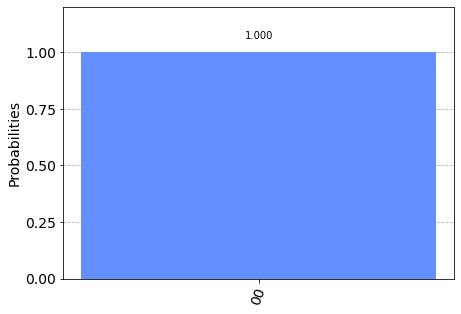

In [5]:
counts = sim.run(qc).result().get_counts()
plot_histogram(counts)

In [6]:
qc = QuantumCircuit(3,2)
qc.x(2)
qc.barrier()
qc.h([0,1,2])
qc.barrier()
qc.barrier()
qc = balanced_black_box(qc)
qc.barrier()
qc.barrier()
qc.h([0,1,2])
qc.measure([0,1],[0,1])
qc.draw()

░ ┌───┐ ░  ░            ░  ░ ┌───┐┌─┐   
q_0: ──────░─┤ H ├─░──░───■────────░──░─┤ H ├┤M├───
           ░ ├───┤ ░  ░   │        ░  ░ ├───┤└╥┘┌─┐
q_1: ──────░─┤ H ├─░──░───┼────■───░──░─┤ H ├─╫─┤M├
     ┌───┐ ░ ├───┤ ░  ░ ┌─┴─┐┌─┴─┐ ░  ░ ├───┤ ║ └╥┘
q_2: ┤ X ├─░─┤ H ├─░──░─┤ X ├┤ X ├─░──░─┤ H ├─╫──╫─
     └───┘ ░ └───┘ ░  ░ └───┘└───┘ ░  ░ └───┘ ║  ║ 
c: 2/═════════════════════════════════════════╩══╩═
                                              0  1

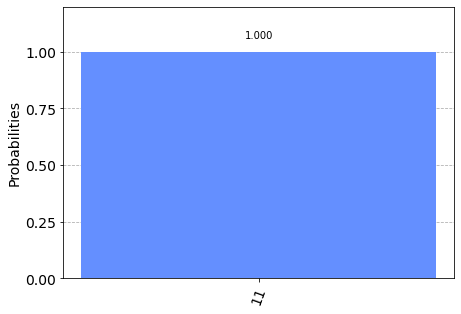

In [7]:
counts = sim.run(qc).result().get_counts()
plot_histogram(counts)